In [ ]:
# initialize stuff
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import sys
import importlib

HOME_DIR = "/Users/oliver/Documents/p5control-bluefors-evaluation"
sys.path.append(HOME_DIR)
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter


from utilities.cpd4 import cmap, colors
importlib.reload(sys.modules["utilities.corporate_design_colors_v4"])

from utilities.constants import G_0_muS
importlib.reload(sys.modules["theory.utilities.constants"])

<module 'theory.utilities.constants' from '/Users/oliver/Documents/p5control-bluefors-evaluation/theory/utilities/constants.py'>

# tunnel barrier

In [2]:
V_Delta = np.linspace(-4, 4, 1001, dtype="float64")
Delta_meV = 0.18
gamma_meV = 0.01
T_K = 0.1
G_N = 0.76
V_mV = V_Delta * Delta_meV

In [3]:
from theory.models.bcs import get_I_nA as get_I_nA_bcs

importlib.reload(sys.modules["theory.models.bcs"])

I_nA_theo = get_I_nA_bcs(
    V_mV=V_mV,
    Delta_meV=Delta_meV,
    G_N=G_N,
    T_K=T_K,
    gamma_meV=gamma_meV,
)

In [4]:
I_nA_exp = np.copy(I_nA_theo)
# I_nA_exp = savgol_filter(I_nA_exp, 100, 1)
I_nA_exp += (0.5 - np.random.random(len(V_Delta))) * 5
I_nA_exp += (0.5 - np.random.random(len(V_Delta))) * 1

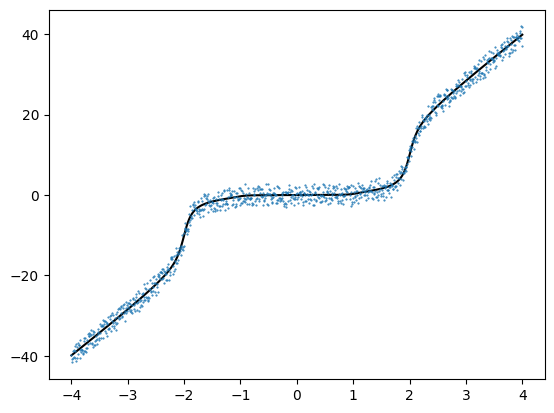

In [5]:
plt.plot(V_Delta, I_nA_theo, "k", label="theo")
plt.plot(V_Delta, I_nA_exp, ".", markersize=1, label="exp")

In [6]:
from theory.optimizers.fit_pat import fit_I_nA as fit_I_nA_pat

importlib.reload(sys.modules["theory.optimizers.models"])
importlib.reload(sys.modules["theory.optimizers.optimizers"])
importlib.reload(sys.modules["theory.optimizers.fit_pat"])

results = fit_I_nA_pat(
    V_mV=V_mV,
    I_nA=I_nA_exp,
    G_N=(1, (0, 10), False),
    Delta_meV=(1, (0, 1), False),
    T_K=(1, (0, 2), False),
    gamma_meV=(1, (0, 1), False),
    model="bcs",
)

I_nA_fit = results["I_fit_nA"]
G_N_fit = results["G_N"]
T_K_fit = results["T_K"]
Delta_meV_fit = results["Delta_meV"]
gamma_meV_fit = results["gamma_meV"]
err = results["perr"]

INFO:2025-12-16 18:15:11,311:jax._src.xla_bridge:812: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/Users/oliver/.pyenv/versions/3.13.3/lib/libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/oliver/.pyenv/versions/3.13.3/lib/libtpu.so' (no such file), '/opt/homebrew/lib/libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache), 'libtpu.so' (no such file)
Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/Users/oliver/.pyenv/versions/3.13.3/lib/libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/oliver/.pyenv/versions/3.13.3/lib/libtpu.so' (no suc

G_N   = 0.7576 | 0.7600 (19) G_0
Delta = 0.1814 | 0.1800 (708) meV
T     = 0.3599 | 0.1000 (13) T
gamma = 0.0104 | 0.0100 (5) meV


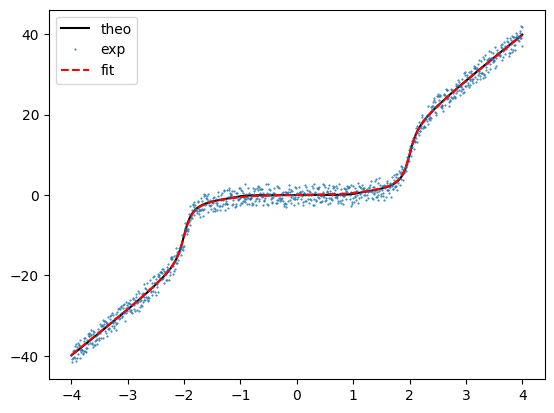

In [7]:
plt.plot(V_Delta, I_nA_theo, "k", label="theo")
plt.plot(V_Delta, I_nA_exp, ".", markersize=1, label="exp")
plt.plot(V_Delta, I_nA_fit, "r--", label="fit")
plt.legend()

print(f"G_N   = {G_N_fit:.4f} | {G_N:.4f} ({err[0]*1e4:.0f}) G_0")
print(f"Delta = {Delta_meV_fit:.4f} | {Delta_meV:.4f} ({err[1]*1e4:.0f}) meV")
print(f"T     = {T_K_fit:.4f} | {T_K:.4f} ({err[2]*1e4:.0f}) T")
print(f"gamma = {gamma_meV_fit:.4f} | {gamma_meV:.4f} ({err[3]*1e4:.0f}) meV")

# Photon-Assisted Tunneling

In [8]:
V_Delta = np.linspace(-4, 4, 1001, dtype="float64")
Delta_meV = 0.18
gamma_meV = 0.01
T_K = 0.1
G_N = 0.76
A_mV = 0.1
nu_GHz = 5
V_mV = V_Delta * Delta_meV

In [9]:
from theory.models.bcs import get_I_nA as get_I_nA_bcs

importlib.reload(sys.modules["theory.models.bcs"])

from theory.models.tg import get_I_pat_nA as get_I_nA_tg

importlib.reload(sys.modules["theory.models.tg"])

I_nA_theo = get_I_nA_bcs(
    V_mV=V_mV,
    Delta_meV=Delta_meV,
    G_N=G_N,
    T_K=T_K,
    gamma_meV=gamma_meV,
)

I_nA_theo = get_I_nA_tg(A_mV=A_mV, V_mV=V_mV, I_nA=I_nA_theo, nu_GHz=nu_GHz)

In [10]:
I_nA_exp = np.copy(I_nA_theo)
# I_nA_exp = savgol_filter(I_nA_exp, 100, 1)
I_nA_exp += (0.5 - np.random.random(len(V_Delta))) * 5
I_nA_exp += (0.5 - np.random.random(len(V_Delta))) * 1

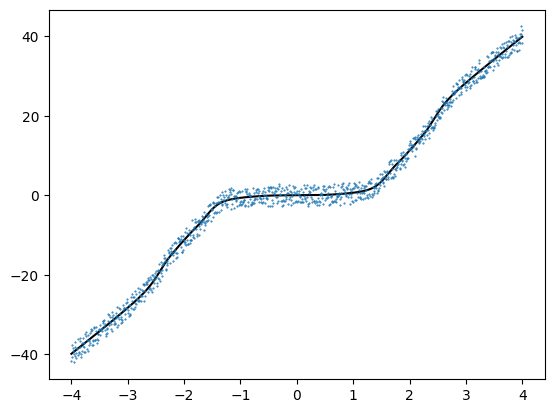

In [11]:
plt.plot(V_Delta, I_nA_theo, "k", label="theo")
plt.plot(V_Delta, I_nA_exp, ".", markersize=1, label="exp")

In [12]:
from theory.optimizers.fit_pat import fit_I_nA as fit_I_nA_pat

importlib.reload(sys.modules["theory.optimizers.fit_pat"])

results = fit_I_nA_pat(
    V_mV=V_mV,
    I_nA=I_nA_exp,
    G_N=(0.8, (0, 1), False),
    Delta_meV=(0.18, (0.17, 0.2), False),
    T_K=(0.1, (0, 1.2), False),
    gamma_meV=(0.01, (0, 0.1), False),
    A_mV=(0.1, (0, 1), False),
    nu_GHz=(5, (4.95, 5.05), False),
    model="pat",
)

I_nA_fit = results["I_fit_nA"]
G_N_fit = results["G_N"]
T_K_fit = results["T_K"]
Delta_meV_fit = results["Delta_meV"]
gamma_meV_fit = results["gamma_meV"]
A_mV_fit = results["A_mV"]
nu_GHz_fit = results["nu_GHz"]
err = results["perr"]

G_N   = 0.7612 | 0.7600 (33) G_0
Delta = 0.1814 | 0.1800 (342) meV
T     = 0.0021 | 0.1000 (11) T
gamma = 0.0095 | 0.0100 (15) meV
A     = 0.1065 | 0.1000 (33) mV
nu    = 4.9526 | 5.0000 (19746) GHz


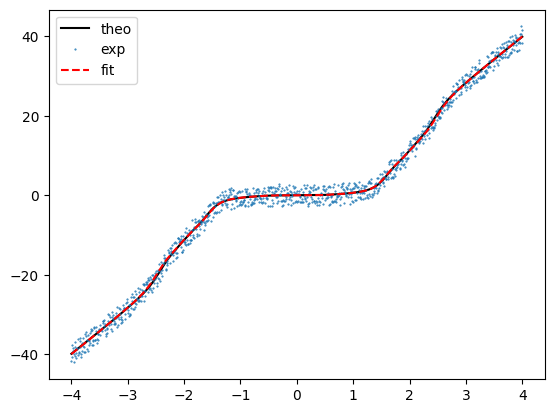

In [13]:
plt.plot(V_Delta, I_nA_theo, "k", label="theo")
plt.plot(V_Delta, I_nA_exp, ".", markersize=1, label="exp")
plt.plot(V_Delta, I_nA_fit, "r--", label="fit")
plt.legend()

print(f"G_N   = {G_N_fit:.4f} | {G_N:.4f} ({err[0]*1e4:.0f}) G_0")
print(f"Delta = {Delta_meV_fit:.4f} | {Delta_meV:.4f} ({err[1]*1e4:.0f}) meV")
print(f"T     = {T_K_fit:.4f} | {T_K:.4f} ({err[2]*1e4:.0f}) T")
print(f"gamma = {gamma_meV_fit:.4f} | {gamma_meV:.4f} ({err[3]*1e4:.0f}) meV")
print(f"A     = {A_mV_fit:.4f} | {A_mV:.4f} ({err[4]*1e4:.0f}) mV")
print(f"nu    = {nu_GHz_fit:.4f} | {nu_GHz:.4f} ({err[5]*1e4:.0f}) GHz")

# atomic contact (single-channel)

In [14]:
V_Delta = np.linspace(0, 4, 501, dtype="float64")
tau_0 = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3]
G_N_0 = np.sum(tau_0)
Delta_meV = 0.18
gamma_meV = 0.01
T_K = 0.1
V_mV = V_Delta * Delta_meV

In [15]:
from theory.models.ha_sym import get_I_nA as get_I_nA_ha

importlib.reload(sys.modules["theory.models.ha_sym"])

I_nA_theo = np.zeros_like(V_mV)
for tau_i in tau_0:
    I_nA_theo += get_I_nA_ha(
        V_mV=V_mV,
        Delta_meV=Delta_meV,
        tau=tau_i,
        T_K=T_K,
        gamma_meV=gamma_meV,
    )

In [16]:
from scipy.signal import savgol_filter

I_nA_exp = np.copy(I_nA_theo)
I_nA_exp += (0.5 - np.random.random(len(V_Delta))) * 5
I_nA_exp += (0.5 - np.random.random(len(V_Delta))) * 1

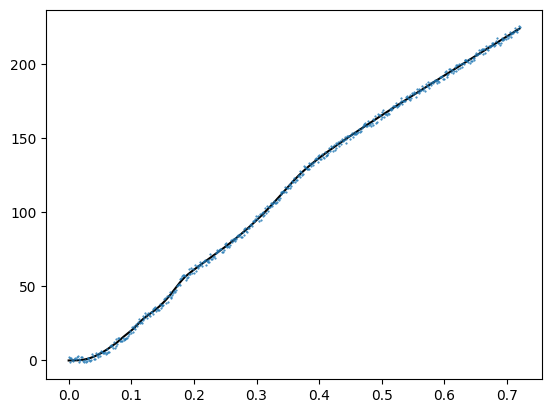

In [17]:
plt.plot(V_mV, I_nA_theo, "k", label="theo")
plt.plot(V_mV, I_nA_exp, ".", markersize=1, label="exp")

In [18]:
from theory.optimizers.fit_pincode import get_pincode

importlib.reload(sys.modules["theory.optimizers.fit_pincode"])

pincode, I_nA_fit = get_pincode(V_mV=V_mV, I_nA=I_nA_exp, ch_max=6)

G_N = 3.20 | 3.30 (G_0)
tau_0 = 0.80 | 0.80
tau_1 = 0.62 | 0.70
tau_2 = 0.58 | 0.60
tau_3 = 0.58 | 0.50
tau_4 = 0.53 | 0.40
tau_5 = 0.10 | 0.30


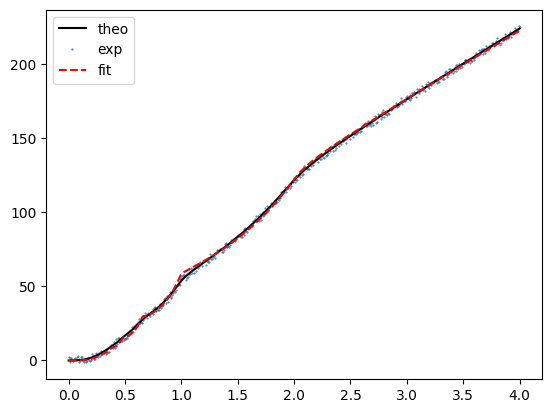

In [19]:
plt.plot(V_Delta, I_nA_theo, "k", label="theo", zorder=2)
plt.plot(V_Delta, I_nA_exp, ".", markersize=1, label="exp", zorder=1)
plt.plot(V_Delta, I_nA_fit, "r--", label="fit", zorder=3)
plt.legend()

print(f"G_N = {np.sum(pincode):.2f} | {np.sum(tau_0):.2f} (G_0)")
for i, tau_i in enumerate(pincode):
    print(f"tau_{i} = {tau_i:.2f} | {tau_0[i]:.2f}")

# Multi-channel Atomic Contact

In [20]:

%reload_ext autoreload
%autoreload 2
import sys
import importlib

import numpy as np

HOME_DIR = "/Users/oliver/Documents/p5control-bluefors-evaluation"
sys.path.append(HOME_DIR)

V_exp_mV = np.linspace(0, 4, 1001, dtype="float64")* 0.18
tau_exp = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3]
G_N_exp = np.sum(tau_exp)
Delta_exp_meV = .184
gamma_exp_meV = 0.003
T_exp_K = 0.1

from theory.models.ha_sym import get_I_nA as get_I_nA_ha
importlib.reload(sys.modules["theory.models.ha_sym"])

I_exp_nA = np.zeros_like(V_exp_mV)
for tau_exp_i in tau_exp:
    I_exp_nA += get_I_nA_ha(
        V_mV=V_exp_mV,
        Delta_meV=Delta_exp_meV,
        tau=tau_exp_i,
        T_K=T_exp_K,
        gamma_meV=gamma_exp_meV,
    )
# I_exp_nA += (0.5 - np.random.random(len(V_exp_mV))) * 5
I_exp_nA += (0.5 - np.random.random(len(V_exp_mV))) * 1

from theory.optimizers.fit_atomic_contact import fit_atomic_contact
importlib.reload(sys.modules["theory.optimizers.fit_atomic_contact"])

results = fit_atomic_contact(
    V_exp_mV=V_exp_mV, 
    I_exp_nA=I_exp_nA, 
    Tau_min=3.25,
    Tau_max=3.35,
    n_channel=6, 
    )

/Users/oliver/Documents/p5control-bluefors-evaluation/theory/optimizers/fit_atomic_contact.py:313: RuntimeWarning: divide by zero encountered in divide
  G_exp = np.where(V_exp_mV != 0, I_exp_nA / V_exp_mV / G_0_muS, np.nan)


(T, Δ, γ):   0%|          | 0/480 [00:00<?, ?it/s]

/Users/oliver/Documents/p5control-bluefors-evaluation/theory/optimizers/fit_atomic_contact.py:505: RuntimeWarning: invalid value encountered in divide
  I_fit_nA / V_exp_mV / G_0_muS,


generation_time = 7.46 s
fitting_time = 78.18 s
--------------------------
816463 possibilities within
(3.25 - 3.35) G_0, for
6 channels and
48 transmissions
--------------------------
for 480 parameter
- 4 temperatures
- 12 energy gaps
- 10 dynes parameter
 
τ_0 = 0.27 (0.09)
τ_1 = 0.40 (0.08)
τ_2 = 0.51 (0.08)
τ_3 = 0.61 (0.06)
τ_4 = 0.69 (0.05)
τ_5 = 0.78 (0.03)
Στ = 3.26
--------------------------
T_fit = 0.3 K
Δ_fit = 184.0 μeV
γ_fit = 1.00 μeV


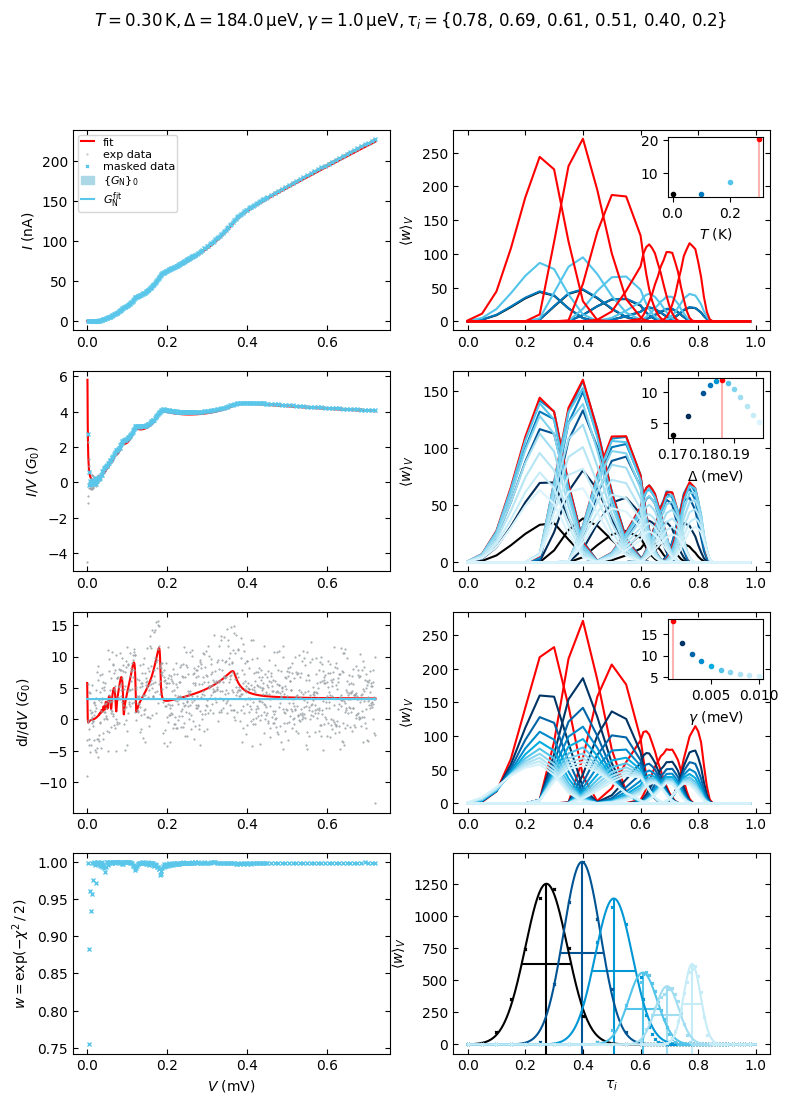

In [25]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from theory.optimizers.fit_atomic_contact_plotter import plot_atomic_contact
importlib.reload(sys.modules["theory.optimizers.fit_atomic_contact_plotter"])

plot_atomic_contact(results)